In [26]:
%matplotlib inline
import pymc3 as pm
import sys
sys.path.append('../..')
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from data import get_simulated_data

In [2]:
with open('40O_10C_20p0_140S_1R-p020_R1_sampling.pck', 'rb') as f:
    trace = pickle.load(f)

In [5]:
trace.varnames

['tau-normal_log__',
 'tau-invGamma_log__',
 'lamb-Normal_log__',
 'lamb-invGamma_log__',
 'z',
 'alpha',
 'tau-normal',
 'tau-invGamma',
 'tau',
 'lamb-Normal',
 'lamb-invGamma',
 'lambda',
 'beta']

In [27]:
sim_data = get_simulated_data('40O_10C_20p0_140S_1R')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a1a358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122fc4b70>]], dtype=object)

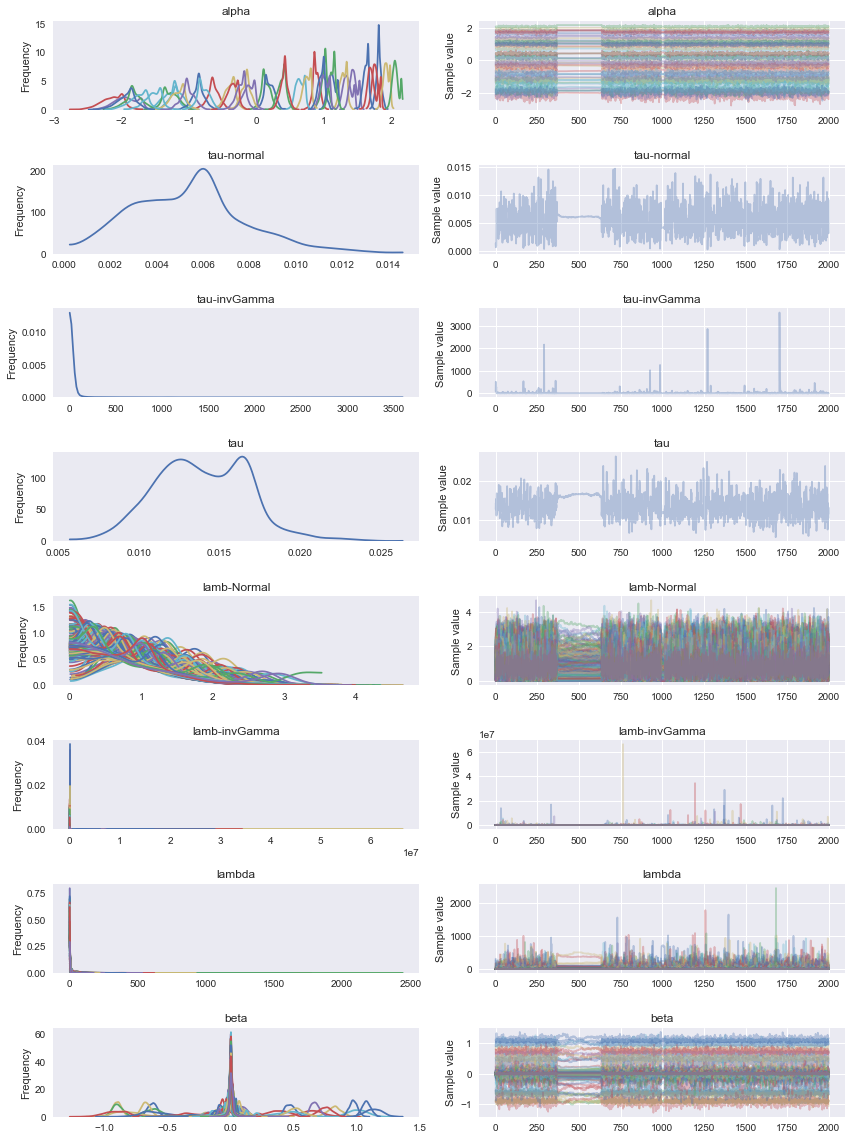

In [6]:
pm.traceplot(trace, ['alpha', 'tau-normal', 'tau-invGamma', 'tau', 'lamb-Normal', 'lamb-invGamma', 'lambda', 'beta'])

In [43]:
tau_trace = trace['tau']
lambda_trace = trace['lambda']
lambdanorm_trace = trace['lamb-Normal']
beta_trace = trace['beta']
alpha_trace = trace['alpha']
diverging = trace.diverging
in_diverging_region = lambda i: True if 380 < i < 620 else False
diverging_selector = list(map(in_diverging_region, range(2000)))
diverging_colors = list(map(lambda d: 'r' if d else 'b', trace.diverging))
diverging_colors = list(map(lambda d: 'orange' if not in_diverging_region(d[0]) and d[1] == 'r' else d[1], enumerate(diverging_colors)))

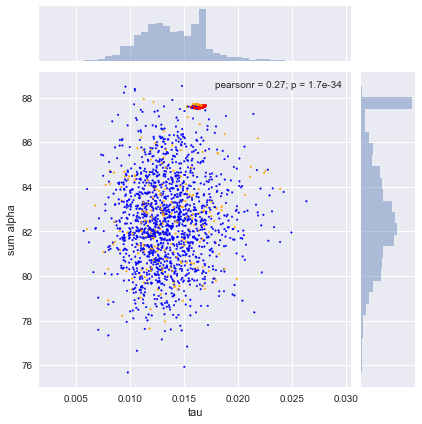

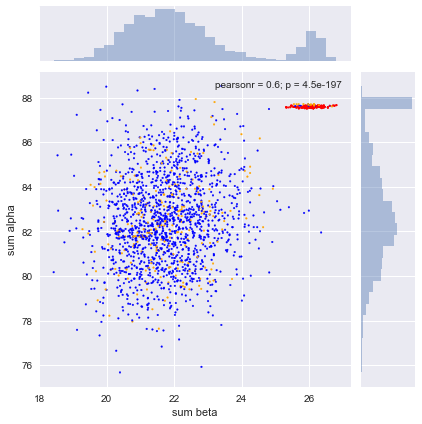

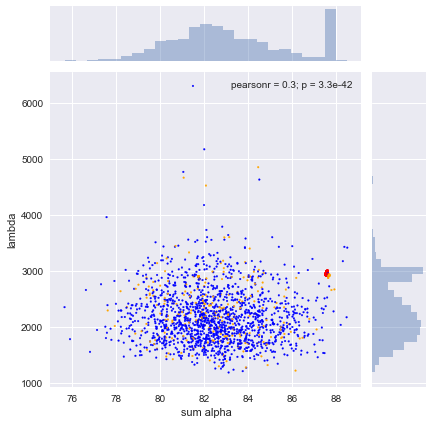

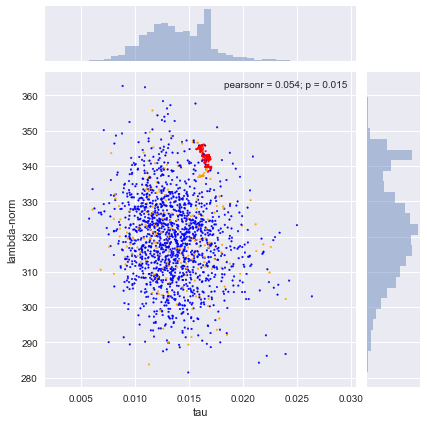

In [51]:
tau = pd.Series(tau_trace, name='tau')
alph = pd.Series(np.exp(alpha_trace).sum(axis=1), name='sum alpha')
bet = pd.Series(np.abs(beta_trace).sum(axis=1).sum(1), name='sum beta')

lam = pd.Series(lambda_trace.sum(axis=1).sum(1), name='lambda')
lamnorm = pd.Series(lambdanorm_trace.sum(axis=1).sum(1), name='lambda-norm')
sns.jointplot(tau, alph, joint_kws={'color':diverging_colors, 's':3})
sns.plt.show()
sns.jointplot(bet, alph, joint_kws={'color':diverging_colors, 's':3})
sns.plt.show()
sns.jointplot(alph, lam, joint_kws={'color':diverging_colors, 's':3})
sns.plt.show()
sns.jointplot(tau, lamnorm, joint_kws={'color':diverging_colors, 's':3})
sns.plt.show()
None

In [ ]:
trace

In [36]:
covariates = sim_data['covariates']
effect_trace = []
for b in beta_trace:
    effect_trace.append(np.dot(covariates, b))
effect_trace = np.array(effect_trace)
dirichlet_precision = pd.Series(np.exp(alpha_trace[:, np.newaxis, :] + effect_trace).sum(axis=2).mean(axis=1), name='Dirichlet precision')


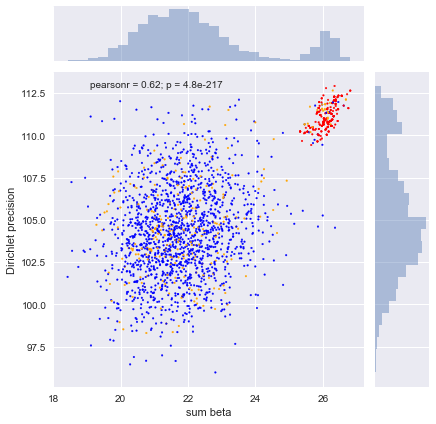

In [54]:
sns.jointplot(bet, dirichlet_precision, joint_kws={'color':diverging_colors, 's':3})

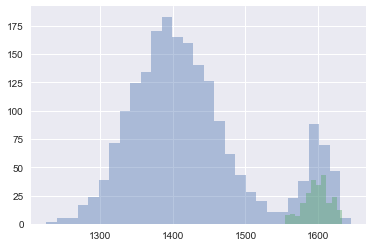

In [59]:
sns.distplot(np.abs(effect_trace).sum(axis=1).sum(axis=1), kde=False, norm_hist=False)
sns.distplot(np.abs(effect_trace[diverging_selector]).sum(axis=1).sum(axis=1), kde=False, norm_hist=False)

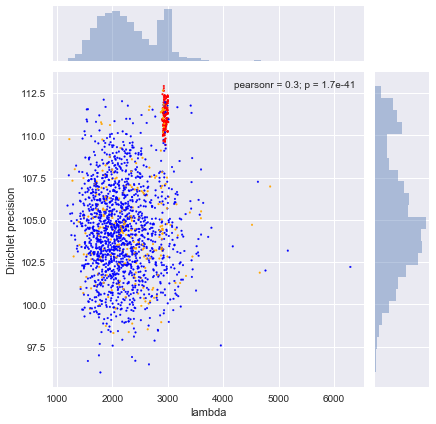

In [53]:
sns.jointplot(lam, dirichlet_precision, joint_kws={'color':diverging_colors, 's':3})